### Task 1 - Preproccess the data

In [ ]:
!pip install mne
!pip install -U mne-connectivity

In [37]:
import numpy as np
import mne
from scipy.io import loadmat
from scipy.signal import welch
from scipy.stats import ttest_ind
import pandas as pd
from scipy.stats import entropy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [9]:
# Load the EEG data from .mat files
healthy_data1 = loadmat('/content/H1.mat')
healthy_data2 = loadmat('/content/H2.mat')
healthy_data3 = loadmat('/content/H3.mat')

schizophrenia_data1 = loadmat('/content/Sch1.mat')
schizophrenia_data2 = loadmat('/content/Sch2.mat')
schizophrenia_data3 = loadmat('/content/Sch3.mat')

In [ ]:
# Create MNE Raw objects
sfreq = 250
CH_NUMBER = 19

healthy_raw1 = mne.io.RawArray(healthy_data1.get('H1'), mne.create_info(CH_NUMBER, sfreq, ch_types='eeg'))
healthy_raw2 = mne.io.RawArray(healthy_data2.get('H2'), mne.create_info(CH_NUMBER, sfreq, ch_types='eeg'))
healthy_raw3 = mne.io.RawArray(healthy_data3.get('H3'), mne.create_info(CH_NUMBER, sfreq, ch_types='eeg'))

schizophrenia_raw1 = mne.io.RawArray(schizophrenia_data1.get('Sch1'), mne.create_info(CH_NUMBER, sfreq, ch_types='eeg'))
schizophrenia_raw2 = mne.io.RawArray(schizophrenia_data2.get('Sch2'), mne.create_info(CH_NUMBER, sfreq, ch_types='eeg'))
schizophrenia_raw3 = mne.io.RawArray(schizophrenia_data3.get('Sch3'), mne.create_info(CH_NUMBER, sfreq, ch_types='eeg'))

# Concatenate the datasets
healthy_raw = mne.concatenate_raws([healthy_raw1, healthy_raw2, healthy_raw3])
schizophrenia_raw = mne.concatenate_raws([schizophrenia_raw1, schizophrenia_raw2, schizophrenia_raw3])

# Apply bandpass filter to remove high-frequency noise
healthy_raw.filter(l_freq=1, h_freq=50)  # Adjust the frequency range as needed
schizophrenia_raw.filter(l_freq=1, h_freq=50)

# Remove power line interference (50 Hz)
healthy_raw.notch_filter(freqs=50)
schizophrenia_raw.notch_filter(freqs=50)


Creating RawArray with float64 data, n_channels=19, n_times=231250
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Creating RawArray with float64 data, n_channels=19, n_times=227500
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Creating RawArray with float64 data, n_channels=19, n_times=227500
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Creating RawArray with float64 data, n_channels=19, n_times=211250
    Range : 0 ... 211249 =      0.000 ...   844.996 secs
Ready.
Creating RawArray with float64 data, n_channels=19, n_times=286250
    Range : 0 ... 286249 =      0.000 ...  1144.996 secs
Ready.
Creating RawArray with float64 data, n_channels=19, n_times=241000
    Range : 0 ... 240999 =      0.000 ...   963.996 secs
Ready.
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 3 contiguous segments
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 3 contiguous segments
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,50.00 Hz


### Task 2 - Segment the data into 2 second

In [ ]:
# Divide into 2-second segments
duration = 2  # in seconds
healthy_epochs = mne.make_fixed_length_epochs(healthy_raw, duration=duration)
schizophrenia_epochs = mne.make_fixed_length_epochs(schizophrenia_raw, duration=duration)

Not setting metadata
1372 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1477 matching events found
No baseline correction applied
0 projection items activated


### Task 3 - Extract
- Mean
- Standard derivation
- total signal power
- Alpha band power
- Beta band power
- theta band power
- fourier series coefficients

for each segment

In [63]:

# Define frequency bands
freq_bands = {'theta': (4, 8),
              'alpha': (8, 13),
              'beta': (13, 30)}

# Function to calculate band power
def calculate_band_power(data, sfreq, freq_band):
    psd, freqs = mne.time_frequency.psd_array_welch(data, sfreq=sfreq, fmin=freq_band[0], fmax=freq_band[1])
    return np.sum(psd, axis=-1)

# Function to extract features from each segment
def extract_features(epochs):
    global sfreq
    features = []

    for epoch in epochs:
        data = epoch  # Get the EEG data for the epoch
        sfreq = sfreq

        # Calculate mean and standard deviation
        mean = np.mean(data, axis=-1, keepdims=True)
        std = np.std(data, axis=-1, keepdims=True)

        # Calculate total signal power
        total_power = np.sum(data ** 2, axis=-1, keepdims=True)

        # Calculate band powers
        alpha_power = calculate_band_power(data, sfreq, freq_bands['alpha'])
        beta_power = calculate_band_power(data, sfreq, freq_bands['beta'])
        theta_power = calculate_band_power(data, sfreq, freq_bands['theta'])

        # Flatten the band powers
        alpha_power = alpha_power.reshape(alpha_power.shape[0], -1)
        beta_power = beta_power.reshape(beta_power.shape[0], -1)
        theta_power = theta_power.reshape(theta_power.shape[0], -1)

        # Calculate Fourier series coefficients and flatten them
        fourier_coeffs = np.abs(np.fft.fft(data, axis=-1)).reshape(data.shape[0], -1)

        # Append features for the current segment
        segment_features = np.concatenate([mean, std, total_power, alpha_power, beta_power, theta_power, fourier_coeffs], axis=-1)
        features.append(segment_features)

    return np.array(features)

# Extract features for healthy and schizophrenia segments
healthy_features = extract_features(healthy_epochs)
schizophrenia_features = extract_features(schizophrenia_epochs)
print(healthy_features)
print(schizophrenia_features)

Streaming output truncated to the last 5000 lines.
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (

### Task 4 - Extract features for Each channel using suitable statistical test

In [10]:
healthy_data = healthy_epochs.get_data()
schizophrenia_data = schizophrenia_epochs.get_data()

# Initialize parameters
WINDOW_SIZE = 100
OVERLAP = 0

# Create an array to store the labels (0 for healthy, 1 for schizophrenia)
num_channels = healthy_epochs.get_data().shape[1]
healthy_labels = np.zeros((len(healthy_epochs), 1, 1))
schizophrenia_labels = np.ones((len(schizophrenia_epochs), 1, 1))

# Ensure the shape of labels matches the number of epochs
healthy_labels_broadcasted = np.tile(healthy_labels, (1, num_channels, healthy_epochs.get_data().shape[2]))
schizophrenia_labels_broadcasted = np.tile(schizophrenia_labels, (1, num_channels, schizophrenia_epochs.get_data().shape[2]))

# Concatenate the data and labels along the last dimension
healthy_data_with_labels = np.concatenate([healthy_epochs.get_data(), healthy_labels_broadcasted], axis=-1)
schizophrenia_data_with_labels = np.concatenate([schizophrenia_epochs.get_data(), schizophrenia_labels_broadcasted], axis=-1)

# Concatenate the data from both groups along the first axis
all_data = np.concatenate([healthy_data_with_labels, schizophrenia_data_with_labels], axis=0)

# Create an array to store labels
labels = np.concatenate([np.zeros(len(healthy_epochs)), np.ones(len(schizophrenia_epochs))])

# Define frequency bands for PSD
freq_bands = {'alpha': [8, 13], 'beta': [13, 30], 'theta': [4, 8]}

# Create an array to store t-test results
t_test_results = np.zeros((num_channels, 5, len(freq_bands), all_data.shape[2] - 1))  # 5 features, 3 frequency bands, excluding the label column

# Iterate over channels
for channel in range(num_channels):
    # Iterate over features
    for feature in range(all_data.shape[2] - 1):  # Exclude the label column
        # Extract data for the current channel and feature
        healthy_channel_feature_data = all_data[:len(healthy_epochs), channel, feature]
        schizophrenia_channel_feature_data = all_data[len(healthy_epochs):, channel, feature]

        # 1. Time-domain Amplitudes
        _, t_test_results[channel, 0, :, feature] = ttest_ind(healthy_channel_feature_data, schizophrenia_channel_feature_data, axis=0, equal_var=False)

        # 2. Power Spectral Density (PSD)
        _, psd_healthy = welch(healthy_channel_feature_data, fs=sfreq)
        _, psd_schizophrenia = welch(schizophrenia_channel_feature_data, fs=sfreq)

        for i, (band, freq_range) in enumerate(freq_bands.items()):
            _, t_test_results[channel, 1, i, feature] = ttest_ind(np.sum(psd_healthy[freq_range[0]:freq_range[1]]), np.sum(psd_schizophrenia[freq_range[0]:freq_range[1]]), equal_var=False)

        # 3. Spectral Entropy
        entropy_healthy = entropy(healthy_channel_feature_data.T)
        entropy_schizophrenia = entropy(schizophrenia_channel_feature_data.T)

        # Check for NaN or infinite values and replace them with a default value (e.g., 0)
        entropy_healthy = np.nan_to_num(entropy_healthy, nan=0, posinf=0, neginf=0)
        entropy_schizophrenia = np.nan_to_num(entropy_schizophrenia, nan=0, posinf=0, neginf=0)

        t_test_results[channel, 2, 0, feature] = entropy_healthy - entropy_schizophrenia

# Create a features matrix for each channel in each epoch
features_matrices = t_test_results.reshape((num_channels, -1))


Using data from preloaded Raw for 1372 events and 500 original time points ...
2 bad epochs dropped
Using data from preloaded Raw for 1477 events and 500 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 1370 events and 500 original time points ...
Using data from preloaded Raw for 1370 events and 500 original time points ...
Using data from preloaded Raw for 1476 events and 500 original time points ...
Using data from preloaded Raw for 1370 events and 500 original time points ...
Using data from preloaded Raw for 1476 events and 500 original time points ...


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


### Task 5 - Create Features matrix with label

In [11]:

# Create a features matrix for each channel in each epoch
features_matrices = t_test_results.reshape((num_channels, -1))

# Check the shapes for debugging
print(features_matrices.shape)
print(labels.shape)

# Reshape features_matrices to have the same number of rows as labels
min_epochs = min(features_matrices.shape[1], labels.shape[0])
reshaped_results = features_matrices[:, :min_epochs]  # Remove the extra dimension here

# Flatten the reshaped results
flattened_features = reshaped_results.reshape((num_channels, -1))

# Transpose the flattened features to have each channel's features in separate columns
flattened_features = flattened_features.T

# Create a DataFrame with each channel's features in separate columns
df_columns = [f'Channel_{channel}' for channel in range(num_channels) for i in range(flattened_features.shape[1] // num_channels)]
df = pd.DataFrame(flattened_features, columns=df_columns)

# Add a column for labels
df['Label'] = labels[:min_epochs]

# Print or use the DataFrame for further analysis
print(df)

(19, 14985)
(2846,)
      Channel_0  Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  \
0      0.074909   0.615403   0.842878   0.314362   0.536608   0.036894   
1      0.081617   0.637081   0.675157   0.222264   0.538453   0.039154   
2      0.083897   0.477379   0.367917   0.217680   0.531459   0.039512   
3      0.087950   0.294768   0.189507   0.317123   0.494205   0.041813   
4      0.099706   0.209480   0.167890   0.533044   0.458067   0.046773   
...         ...        ...        ...        ...        ...        ...   
2841   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2842   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2843   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2844   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2845   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

      Channel_6  Channel_7  Channel_8  Channel_9  Channel_10  Channel_11  \
0      0.461440

### Task 6 - Train a model in 2 states:
1- Hold-out = 25%

2- Cross-Validation = 5

In [61]:


# Split the data into training and testing sets (hold-out)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Label', axis=1), df['Label'], test_size=0.25, random_state=42)


# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='sigmoid',
                C=0.1,
                gamma='scale',
                shrinking=False,
                probability=True
                )

svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_svm)


# Perform cross-validation (5-fold)
cv_scores_svm = cross_val_score(svm_model, df.drop('Label', axis=1), df['Label'], cv=5)

print("\nCross-Validation Scores:")
print("Support Vector Machine:", cv_scores_svm.mean())



Support Vector Machine:
Accuracy: 0.5997191011235955

Cross-Validation Scores:
Support Vector Machine: 0.50238399161348


### Task 7 - Calculate Confusion Matrix and estimate system performance

Sensitivity (Recall): 0.5561643835616439
Specificity: 0.6455331412103746
Positive Predictive Value (Precision): 0.6226993865030674
Diagnostic Odds Ratio (DOR): 2.2820435611763523
Area Under the ROC Curve (AUC): 0.6002842367060124


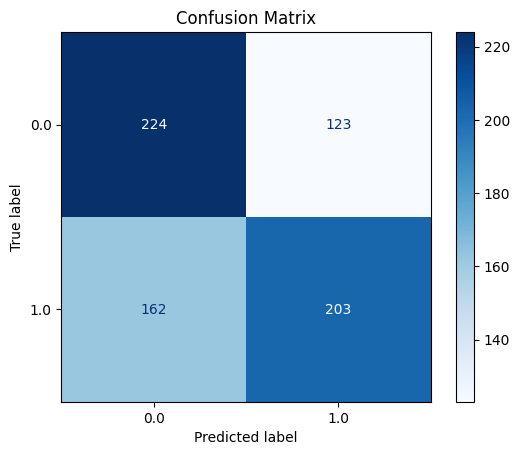

In [62]:
# Calculate Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# True Positive (TP)
tp = conf_matrix_svm[1, 1]

# True Negative (TN)
tn = conf_matrix_svm[0, 0]

# False Positive (FP)
fp = conf_matrix_svm[0, 1]

# False Negative (FN)
fn = conf_matrix_svm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Positive Predictive Value (Precision)
ppv = tp / (tp + fp)

# Negative Predictive Value (NPV)
npv = tn / (tn + fn)

# Diagnostic Odds Ratio (DOR)
dor = (tp * tn) / (fp * fn)

# Area Under the ROC Curve (AUC) can be obtained from the ROC curve
y_prob_svm = svm_model.decision_function(X_test)
auc = roc_auc_score(y_test, y_prob_svm)

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", ppv)
print("Diagnostic Odds Ratio (DOR):", dor)
print("Area Under the ROC Curve (AUC):", auc)


# Display Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
      svm_model,
      X_test,
      y_test,
      cmap=plt.cm.Blues,
  )
disp.ax_.set_title("Confusion Matrix")
plt.show()
